# Visualisation of age estimation distribution for all data sets


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np

# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


### Loading data

In [2]:
def load_data(path):
    f = open(path)
    data = json.load(f)
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Age'])
    f.close()

    # removing nans
    nans = df['Age'].isna().sum()
    df = df.dropna()

    describe = df.describe()
    value_counts = df.value_counts()

    # make new column for the identity based on the index
    df['Identity'] = df.index
    df['Identity'] = df.index.str.rsplit('_', 1).str[0]

    df = df.sort_values(by='Age')

    return df, nans, describe, value_counts


# Age estimations json load

In [3]:
df_YLFW = load_data('age_estimations/YLFW_output_data_precroped_all_age.json')[0]
df_YLFW.Age = df_YLFW.Age.astype(int)
df_YLFW = df_YLFW.sort_values(by='Age', ascending=True)

df_RFW_african = load_data('age_estimations/data sendt fra Gabi senest/output_african.json')[0]
df_RFW_asian = load_data('age_estimations/data sendt fra Gabi senest/output_asian.json')[0]
df_RFW_caucasian = load_data('age_estimations/data sendt fra Gabi senest/output_caucasian.json')[0]
df_RFW_indian = load_data('age_estimations/data sendt fra Gabi senest/output_indian.json')[0]
df_RFW = pd.concat([df_RFW_african, df_RFW_asian, df_RFW_caucasian, df_RFW_indian])
df_RFW.Age = df_RFW.Age.astype(int)
df_RFW = df_RFW.sort_values(by='Age', ascending=True)


# How many of each identity

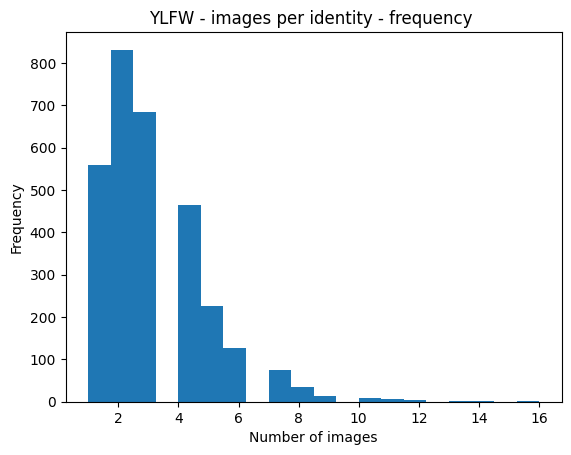

In [4]:
df_YLFW['Identity'].value_counts()
# plot amount of the same identity
df_YLFW['Identity'].value_counts().plot(kind='hist', bins=20)
plt.title('YLFW - images per identity - frequency ')
plt.xlabel('Number of images')
plt.show()

In [5]:
print(df_YLFW['Identity'].describe())
df_YLFW['Identity'].value_counts().mean()

count           9229
unique          3042
top       Indian_602
freq              16
Name: Identity, dtype: object


3.0338593030900722

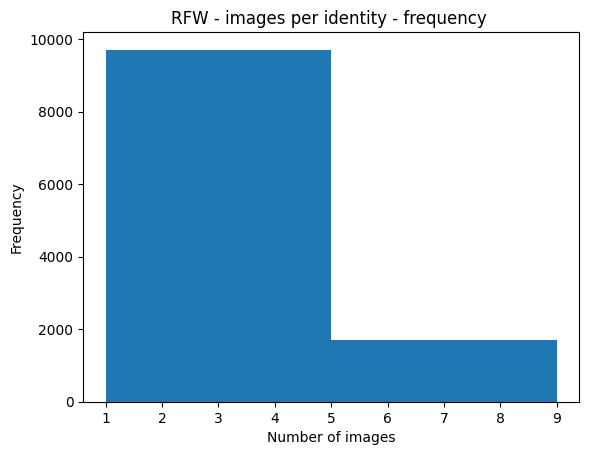

In [6]:
df_RFW['Identity'].value_counts()
# plot amount of the same identity
df_RFW['Identity'].value_counts().plot(kind='hist', bins=2)
plt.xlabel('Number of images')
plt.title('RFW - images per identity - frequency ')
plt.show()


In [7]:
print(df_RFW['Identity'].describe())
print(df_RFW['Identity'].value_counts().mean())

count         40448
unique        11416
top       m.02qzvw6
freq              9
Name: Identity, dtype: object
3.5430974071478625


## Plotting the distribution

In [152]:
# def plot_demographic_distribution(df, title, column="Age", bins=30, color="skyblue", figsize=(10, 6)):
#     """
#     Plots an improved histogram with a kernel density estimate for the specified column.

#     Parameters:
#     - df: Pandas DataFrame.
#     - column: str, default "Age"
#         The column name to be used for the histogram.
#     - bins: int, default 30
#         The number of bins to use for the histogram.
#     - color: str, default "skyblue"
#         The color of the histogram bars.
#     - figsize: tuple, default (10, 6)
#         The dimensions for the figure size.
#     """
#     plt.figure(figsize=figsize)  # Set figure size
#     sns.histplot(data=df, x=column, bins=bins, color=color, kde=True)  # Histogram with KDE
#     plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
#     plt.xlabel(column)  # Label for the x-axis
#     plt.ylabel("Count")  # Label for the y-axis
#     plt.xticks(rotation=-45)  # Rotate x-axis labels
#     plt.grid(False)  # Disable grid lines for cleaner look

#     # Improve the layout and show the plot
#     plt.tight_layout()
#     plt.show()


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_demographic_distribution(group, df, title, column="Age", color = 'skyblue', bins=30, figsize=(10, 6)):
    """
    Plots an improved histogram with a kernel density estimate for the specified column
    in a style consistent with unified quality score visualizations.

    Parameters:
    - df: Pandas DataFrame.
    - column: str, default "Age"
        The column name to be used for the histogram.
    - bins: int, default 30
        The number of bins to use for the histogram.
    - figsize: tuple, default (10, 6)
        The dimensions for the figure size.
    """
    # Set the aesthetic style of the plots
    sns.set_style("whitegrid")

    plt.figure(figsize=figsize)  # Set figure size
    # Histogram with KDE in the chosen colors and style

    if group == 'children':

        age_bins = [1, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
        age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18']
        df['Age Group'] = pd.cut(df[column], bins=age_bins, labels=age_labels, right=False)

        ax = sns.histplot(data=df, x='Age Group', bins=age_bins, color=color, kde=False, label=title)
        # ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')


        plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
        plt.xlabel("Age Group")  # Label for the x-axis
        plt.ylabel("Count")  # Label for the y-axis
        plt.xticks(rotation=-45)  # Rotate x-axis labels
        plt.legend()  # Display legend
        plt.grid(True)  # Enable grid lines for a whitegrid look
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points', color='grey')
    else:
        # age_bins = [1, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
        # age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18']
        # df['Age Group'] = pd.cut(df[column], bins=age_bins, labels=age_labels, right=False)

        ax = sns.histplot(data=df, x=column, bins=bins, color=color, kde=False, label=title)
        # ax = sns.countplot(data=df, x='Age Group', palette='coolwarm')


        plt.title(f"{column} Distribution - {title}")  # Dynamic title based on the column name
        plt.xlabel(column)  # Label for the x-axis
        plt.ylabel("Count")  # Label for the y-axis
        plt.xticks(rotation=-45)  # Rotate x-axis labels
        plt.legend()  # Display legend
        plt.grid(True)  # Enable grid lines for a whitegrid look
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5), textcoords='offset points', color='grey')
    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
# df = pd.read_csv('path_to_your_data.csv')
# plot_demographic_distribution(df, "Adults", "Age")


In [153]:
df_YLFW.head()

,Age,Identity
Indian_40_34,0,Indian_40
Caucasian_134_4,0,Caucasian_134
Caucasian_1276_4,0,Caucasian_1276
Asian_624_4,0,Asian_624
Caucasian_1001_3,0,Caucasian_1001


In [158]:
# Example use:
# load utils
import sys
sys.path.insert(0, '../utils')
from Data_proc_utils.Data_proc_funcs import *

random_states = [1,2]
# children_all = pd.read_csv('../data/image_info_csvs/YLFW_full_info_including_adults.csv')
children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[1])

# save as csv
# children_balanced_df_1.to_csv('../data/children_balanced_df_1.csv', index=False)


minority age group from childrens data:  16-18 
number of images:  382 

racial distribution: ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64

16-18 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64
Balanced data?: 16-18    382
0-3      382
4-6      382
7-9      382
10-12    382
13-15    382
Name: children_agegroup, dtype: int64


In [159]:
children_all.Age.describe()

count    9145.000000
mean        8.356151
std         7.423325
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        42.000000
Name: Age, dtype: float64

/tmp/ipykernel_18801/1564186697.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age Group'] = pd.cut(df[column], bins=age_bins, labels=age_labels, right=False)


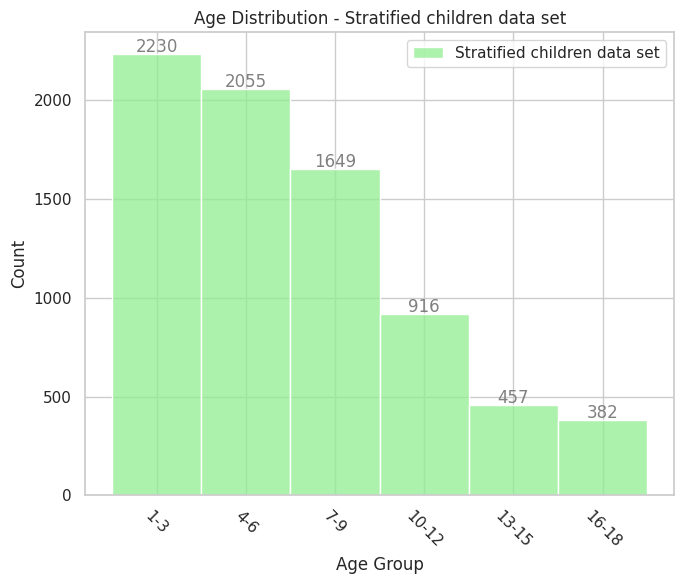

In [169]:
plot_demographic_distribution('children', children_all[children_all.Age <= 18], 'Stratified children data set', column="Age",color='lightgreen', bins=6, figsize=(7, 6))

minority age group from childrens data:  16-18 
number of images:  382 

racial distribution: ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64 

All new groups should have same distribution

Other age group stats: 
0-3
 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64

16-18 ethnicity
African      148
Indian       134
Asian         65
Caucasian     35
Name: image_name, dtype: int64
Balanced data?: 16-18    382
0-3      382
4-6      382
7-9      382
10-12    382
13-15    382
Name: children_agegroup, dtype: int64
Balanced data between adults and children?: 

adults:  ethnicity
African      505
Indian       432
Asian        256
Caucasian    176
Name: identity_name, dtype: int64 
number of enrolled, and non-enrolled ids (a):  559 810 

children:  ethnicity
African      505
Indian       432
Asian        256
Caucasian    176
Name: identity_name, dtype: int64 
number of enro

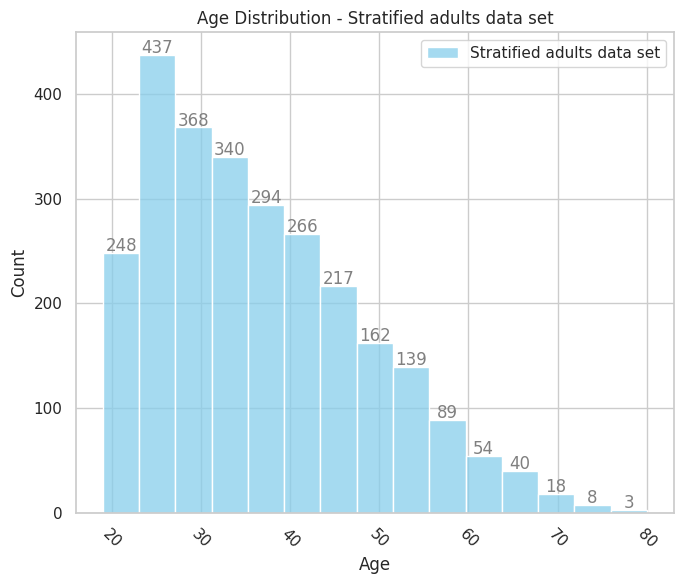

In [170]:
children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=True, random_state=random_states[1])

# Example usage
# random_states = [1,2,3,4,5,6,7,8,9,10]
# children_all = pd.read_csv('../data/YLFW_full_info_excluding_adults.csv')
a_df = pd.read_csv('../data/image_info_csvs/RFW_full_info_excluding_children.csv')
# children_balanced_df_1 = balance_child_data(children_all, print_stats=False, random_state=random_states[0])


adults_all = balance_adults_data_enrolled(children_balanced_df_1, a_df, print_stats=True, random_state=random_states[0])

#a_balanced.to_csv('../data/adults_balanced.csv', index=False)


plot_demographic_distribution('adults', adults_all,'Stratified adults data set', column="Age",color='skyblue', bins=15,  figsize=(7, 6))

### Childrens ages

In [91]:
def plot_age_group_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', color='lightgreen')#palette='coolwarm')
    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


### Adults balanced and children balanced

In [92]:
# TODO skal vist opdateres med image_name
a_df = pd.read_csv('../data/image_info_csvs/adults_balanced.csv')
a_mates = a_df.groupby("im_id").agg({'im_id': ['count']})
a_mated_ids = a_mates[a_mates[('im_id', 'count')] > 1].index
a_nonmated_ids = a_mates[a_mates[('im_id', 'count')] == 1].index


# # Mated and non-mated ids
c_df = pd.read_csv('../data/image_info_csvs/child_balanced.csv')
c_mates = c_df.groupby("im_id").agg({'im_id': ['count']})
c_mated_ids = c_mates[c_mates[('im_id', 'count')] > 1].index
c_nonmated_ids = c_mates[c_mates[('im_id', 'count')] == 1].index


In [93]:
# Add a column with 'Enrolled' for c_mates[c_mates[('im_id', 'count')] > 1] and else 'Non-enrolled'

c_df['Enrolled'] = np.where(c_df['im_id'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')

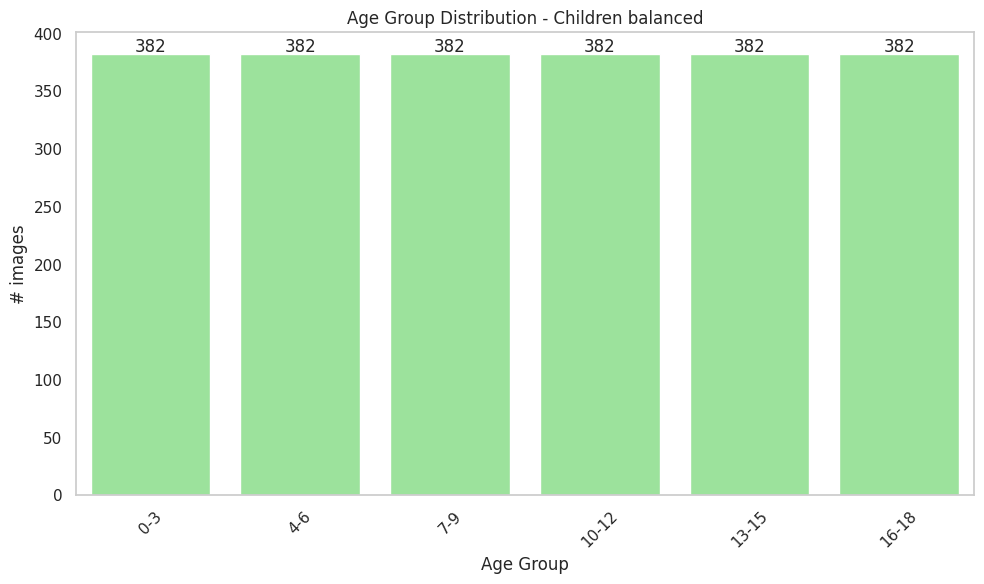

,Unnamed: 0,image_name,Age,ethnicity,children_agegroup,identity_name,Age Group
0,8,Asian_446_33,18,Asian,16-18,Asian_446,16-18
1,23,Indian_385_56,17,Indian,16-18,Indian_385,16-18
2,33,African_560_0,18,African,16-18,African_560,16-18
3,59,Caucasian_530_40,17,Caucasian,16-18,Caucasian_530,16-18
4,61,African_21_0,18,African,16-18,African_21,16-18
...,...,...,...,...,...,...,...
2287,2887,Indian_196_0,15,Indian,13-15,Indian_196,13-15
2288,8945,Indian_370_2,13,Indian,13-15,Indian_370,13-15
2289,5886,Indian_417_1,13,Indian,13-15,Indian_417,13-15
2290,561,Indian_577_30,13,Indian,13-15,Indian_577,13-15


In [94]:
plot_age_group_distribution(children_balanced_df_1 ,'Children balanced')

### YLFW raw

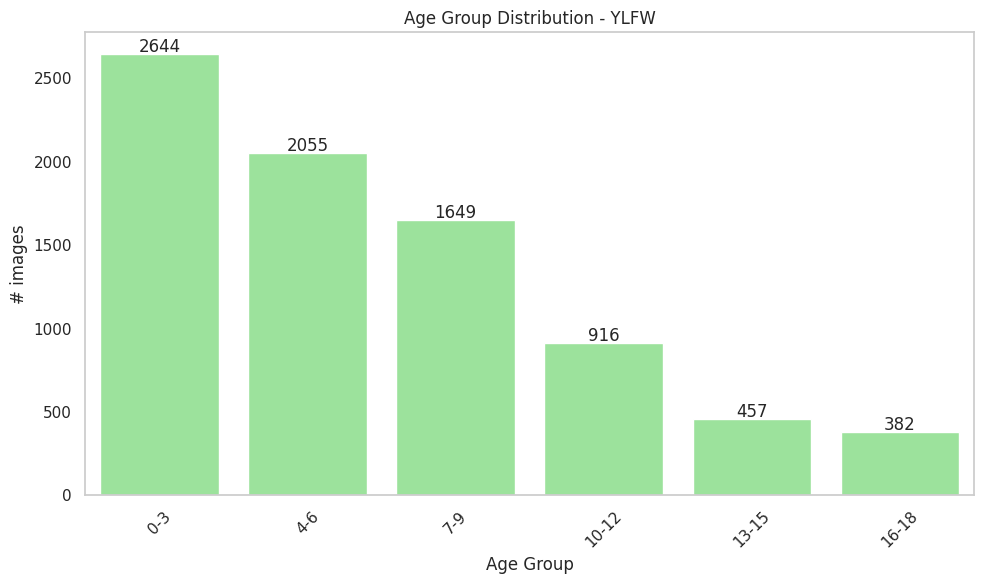

,Unnamed: 0,image_name,Age,ethnicity,children_agegroup,identity_name,Age Group
0,0,Caucasian_1008_18,8,Caucasian,7-9,Caucasian_1008,7-9
1,1,Asian_225_72,11,Asian,10-12,Asian_225,10-12
2,2,Asian_238_1,3,Asian,0-3,Asian_238,0-3
3,3,Caucasian_1110_17,4,Caucasian,4-6,Caucasian_1110,4-6
4,4,Caucasian_364_12,2,Caucasian,0-3,Caucasian_364,0-3
...,...,...,...,...,...,...,...
9140,9224,Indian_132_0,11,Indian,10-12,Indian_132,10-12
9141,9225,Caucasian_367_13,8,Caucasian,7-9,Caucasian_367,7-9
9142,9226,Asian_19_28,29,Asian,NaN,Asian_19,NaN
9143,9227,Asian_554_5,3,Asian,0-3,Asian_554,0-3


In [95]:
plot_age_group_distribution(children_all, 'YLFW')

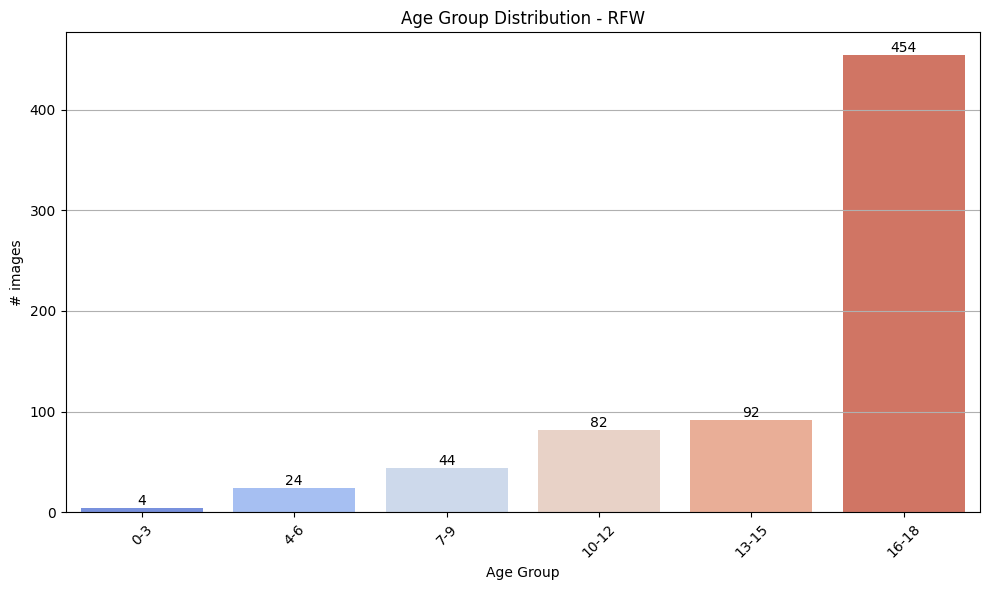

,Age,Identity,Age Group
m.0263vl0_0001,2,m.0263vl0,0-3
m.0gc2zgn_0001,2,m.0gc2zgn,0-3
m.018fwb_0003,3,m.018fwb,0-3
m.03qcz13_0003,3,m.03qcz13,0-3
m.026m8l2_0001,4,m.026m8l2,4-6
...,...,...,...
m.04jmjyy_0001,87,m.04jmjyy,NaN
m.07ssfl_0002,87,m.07ssfl,NaN
m.09v5jqn_0004,87,m.09v5jqn,NaN
m.09tbzt_0003,88,m.09tbzt,NaN


In [20]:
plot_age_group_distribution(df_RFW, 'RFW')

# YLFW and RFW combined

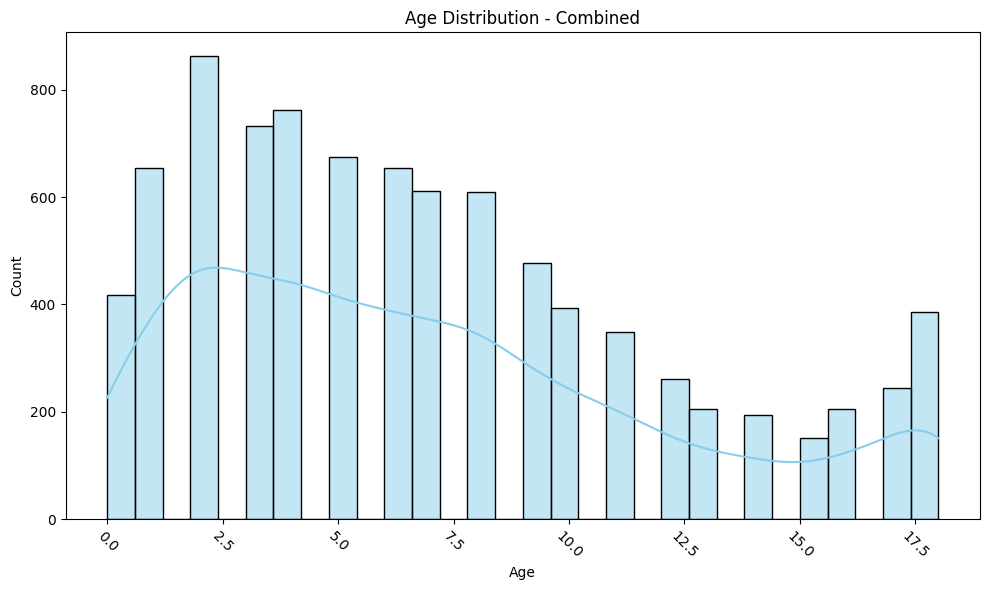

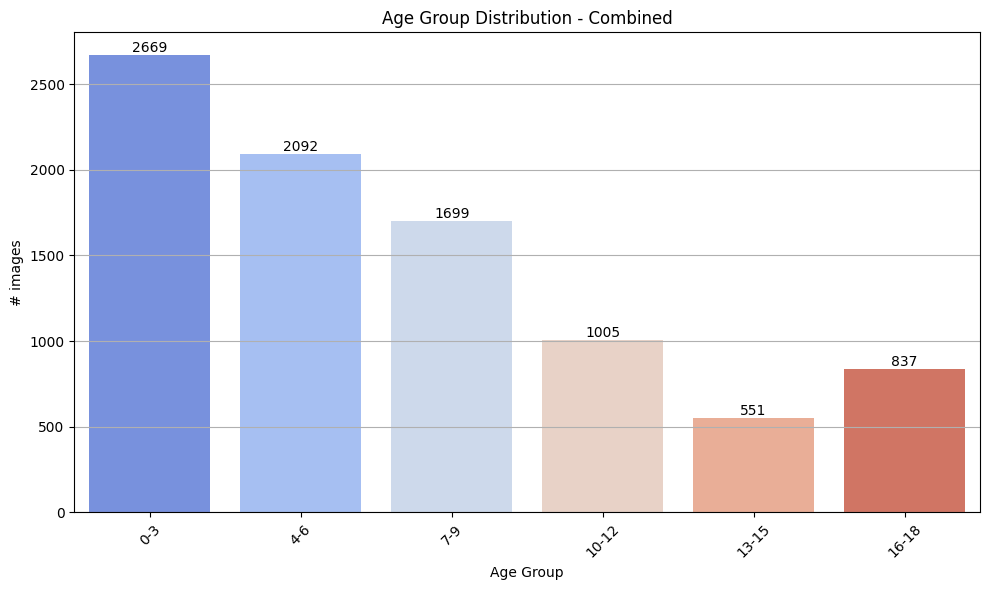

,Age,Identity,Age Group
Indian_40_34,0,Indian_40,0-3
Caucasian_1030_18,0,Caucasian_1030,0-3
Asian_232_25,0,Asian_232,0-3
Caucasian_518_9,0,Caucasian_518,0-3
Asian_290_2,0,Asian_290,0-3
...,...,...,...
African_172_56,18,African_172,16-18
African_413_1,18,African_413,16-18
African_159_3,18,African_159,16-18
Asian_28_0,18,Asian_28,16-18


In [21]:
# combine the two dataframes

df_combined = pd.concat([df_YLFW, df_RFW])
df_combined = df_combined.dropna()
df_combined = df_combined.sort_values(by='Age')

plot_demographic_distribution(df_combined, 'Combined', column="Age", bins=30, color="skyblue", figsize=(10, 6))

plot_age_group_distribution(df_combined, 'Combined')


# Mated and non-meated

A function that counts images per identity and if there are more than one image for the identity 

In [22]:
print(df_combined['Identity'].value_counts())

# add value_counts to the dataframe to each identity
df_combined['Identity Count'] = df_combined['Identity'].map(df_combined['Identity'].value_counts())

# for each identity, get the mean age of all their value_counts
df_combined['Mean Age'] = df_combined.groupby('Identity')['Age'].transform('mean')


Indian_602      16
Indian_528      14
Indian_484      13
African_318     12
African_113     12
                ..
Indian_301       1
Indian_374       1
Indian_474       1
Caucasian_67     1
Indian_454       1
Name: Identity, Length: 3208, dtype: int64


In [23]:
# adding a column that is a 1 if there are 2 or more images per identity and 0 if there is only one image
df_combined['Mated'] = np.where(df_combined['Identity Count'] > 1, 1, 0)
df_combined['Mated'].value_counts()

1    7998
0     855
Name: Mated, dtype: int64

# Plot: number of images in each age group colored by mated 


In [24]:
# number of images in each age group colored by mated

def plot_age_group_distribution_mated(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    # ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

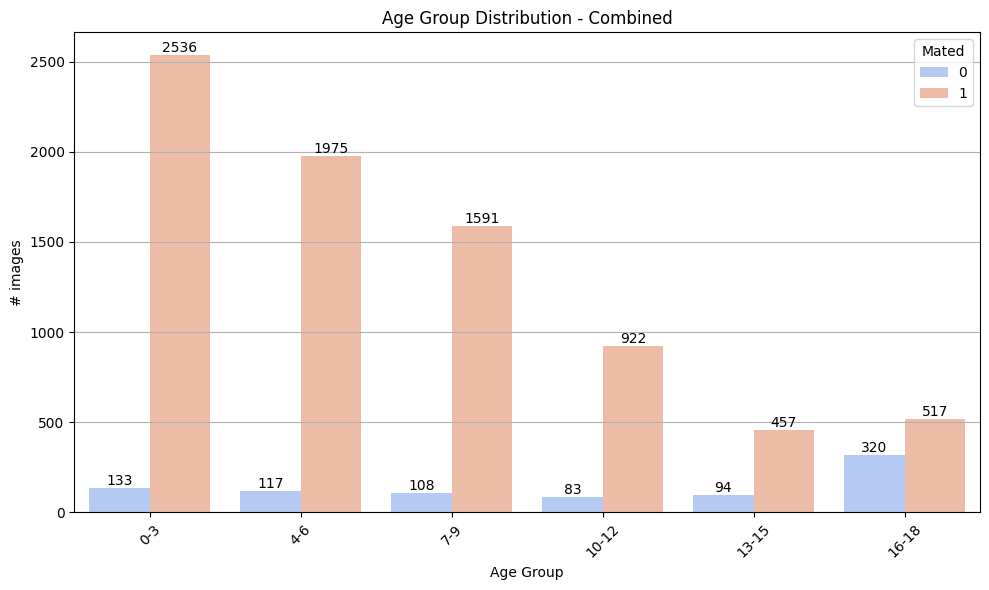

,Age,Identity,Age Group,Identity Count,Mean Age,Mated
Indian_40_34,0,Indian_40,0-3,10,2.300000,1
Caucasian_1030_18,0,Caucasian_1030,0-3,2,0.000000,1
Asian_232_25,0,Asian_232,0-3,4,1.750000,1
Caucasian_518_9,0,Caucasian_518,0-3,3,1.333333,1
Asian_290_2,0,Asian_290,0-3,3,1.333333,1
...,...,...,...,...,...,...
African_172_56,18,African_172,16-18,4,15.500000,1
African_413_1,18,African_413,16-18,2,17.000000,1
African_159_3,18,African_159,16-18,2,16.000000,1
Asian_28_0,18,Asian_28,16-18,6,15.666667,1


In [25]:
plot_age_group_distribution_mated(df_combined, 'Combined')

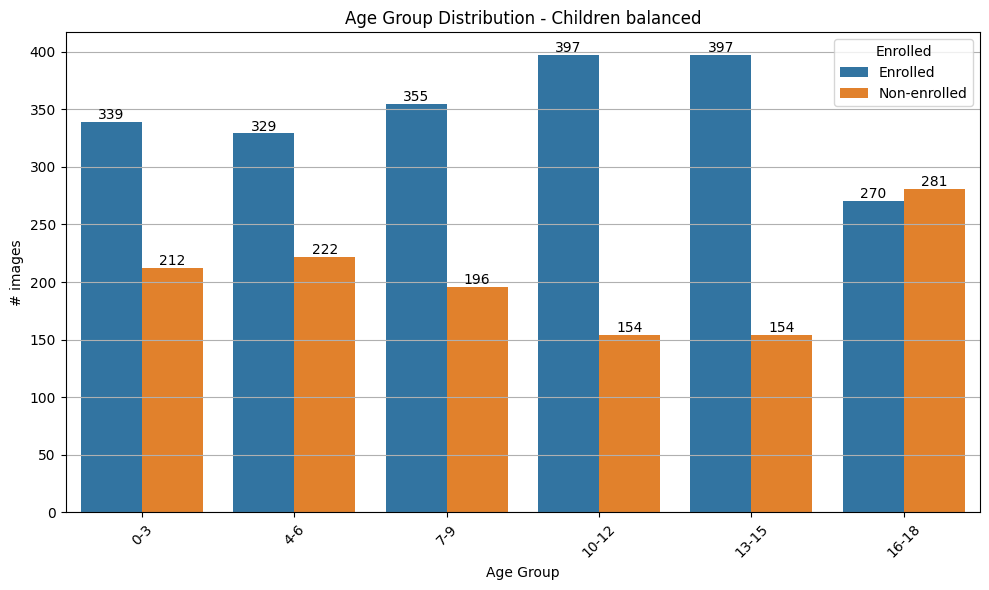

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,Enrolled,13-15
1,Caucasian_346_12,14,Caucasian,346,13-15,Caucasian_346,NaN,Non-enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,Enrolled,13-15
3,African_412_47,13,African,412,13-15,African_412,NaN,Enrolled,13-15
4,Asian_489_46,13,Asian,489,13-15,Asian_489,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...
3301,Indian_579_1,18,Indian,579,16-18,Indian_579,NaN,Non-enrolled,16-18
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,Non-enrolled,16-18
3303,m.0hht5gt_0001,17,Indian,0hht5gt,16-18,m.0hht5gt,1.0,Enrolled,16-18
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,Enrolled,16-18


In [26]:

# number of images in each age group colored by mated

def plot_age_group_distribution_enrolled(df, title, figsize=(10, 6)):
    """
    Plots the distribution of age groups within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Age' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 19]  # adding one more bin for 16-18
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-18']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}


    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Create the bar plot for the age groups
    plt.figure(figsize=figsize)
    # ax = sns.countplot(data=df, x='Age Group', hue='Mated', palette='coolwarm')
    ax = sns.countplot(data=df, x='Age Group', hue='Enrolled', palette=enrolled_palette)

    plt.title(f"Age Group Distribution - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# images")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df
plot_age_group_distribution_enrolled(c_df, 'Children balanced')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def number_of_enrolled_ids_agebin(df, title, figsize=(10, 6)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [0, 4, 7, 10, 13, 16, 20]  # Adjusted to include 19
    age_labels = ['0-3', '4-6', '7-9', '10-12', '13-15', '16-19']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['im_id'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


In [28]:
c_df.groupby(['Age Group', 'Enrolled'])['im_id'].nunique().reset_index(name='Count')


,Age Group,Enrolled,Count
0,0-3,Enrolled,167
1,0-3,Non-enrolled,212
2,4-6,Enrolled,221
3,4-6,Non-enrolled,222
4,7-9,Enrolled,257
5,7-9,Non-enrolled,196
6,10-12,Enrolled,279
7,10-12,Non-enrolled,154
8,13-15,Enrolled,274
9,13-15,Non-enrolled,154


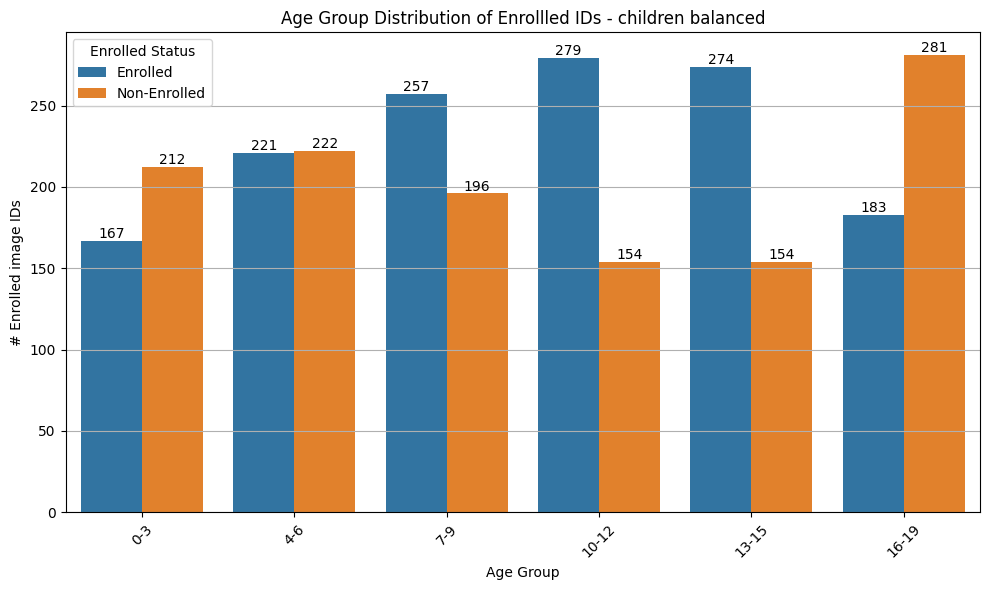

,img_name,Age,ethnicity,id_class,children_agegroup,im_id,face_id,Enrolled,Age Group
0,African_634_22,15,African,634,13-15,African_634,NaN,Enrolled,13-15
1,Caucasian_346_12,14,Caucasian,346,13-15,Caucasian_346,NaN,Non-enrolled,13-15
2,African_699_1,13,African,699,13-15,African_699,NaN,Enrolled,13-15
3,African_412_47,13,African,412,13-15,African_412,NaN,Enrolled,13-15
4,Asian_489_46,13,Asian,489,13-15,Asian_489,NaN,Enrolled,13-15
...,...,...,...,...,...,...,...,...,...
3301,Indian_579_1,18,Indian,579,16-18,Indian_579,NaN,Non-enrolled,16-19
3302,Indian_515_3,18,Indian,515,16-18,Indian_515,NaN,Non-enrolled,16-19
3303,m.0hht5gt_0001,17,Indian,0hht5gt,16-18,m.0hht5gt,1.0,Enrolled,16-19
3304,Indian_415_1,18,Indian,415,16-18,Indian_415,NaN,Enrolled,16-19


In [29]:
number_of_enrolled_ids_agebin(c_df, 'children balanced')

In [30]:
a_df.head()

,img_name,im_id,ethnicity,id_class,face_id,Age,children_agegroup
0,m.0fw3k1_0002,m.0fw3k1,African,0fw3k1,2,20,NaN
1,m.04zvg12_0002,m.04zvg12,African,04zvg12,2,24,NaN
2,m.05mrf5k_0002,m.05mrf5k,African,05mrf5k,2,28,NaN
3,m.07b34k_0003,m.07b34k,African,07b34k,3,44,NaN
4,m.02xgm5_0002,m.02xgm5,African,02xgm5,2,34,NaN


In [31]:
# os. getcwd()
adult_full_incl = pd.read_csv('image_info_csvs/RFW_full_info_including_children.csv')
adult_full_excl = pd.read_csv('image_info_csvs/RFW_full_info_excluding_children.csv')
adult_full_mated = pd.read_csv('image_info_csvs/mated_adults_image_info.csv')
adult_full_nonmated = pd.read_csv('image_info_csvs/nonmated_adults_image_info.csv')

In [41]:
# os. getcwd()
children_full_incl = pd.read_csv('image_info_csvs/YLFW_full_info_including_adults.csv')
children_full_excl = pd.read_csv('image_info_csvs/YLFW_full_info_excluding_adults.csv')
children_full_mated = pd.read_csv('image_info_csvs/mated_children_image_info.csv')
children_full_nonmated = pd.read_csv('image_info_csvs/nonmated_children_image_info.csv')

In [32]:
36135 + 377 # 36512 = mated + nonmated
            # 36407= excluding children

36512

In [43]:
children_full_mated_and_nonmated = pd.concat([children_full_mated,children_full_nonmated ])

In [45]:
children_full_mated_and_nonmated.tail()

,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar
483,Indian_91/Indian_91_0.png,Indian_91_0,non_enrolled,Indian_91,Indian,15.0,Indian_91,36.0
484,Indian_93/Indian_93_1.png,Indian_93_1,non_enrolled,Indian_93,Indian,10.0,Indian_93,NaN
485,Indian_96/Indian_96_0.png,Indian_96_0,non_enrolled,Indian_96,Indian,8.0,Indian_96,NaN
486,Indian_97/Indian_97_10.png,Indian_97_10,non_enrolled,Indian_97,Indian,18.0,Indian_97,49.0
487,Indian_99/Indian_99_1.png,Indian_99_1,non_enrolled,Indian_99,Indian,2.0,Indian_99,9.0


In [46]:
# children_full_mated_and_nonmated.to_csv('children_full_mated_and_nonmated.csv')

In [47]:
display(adult_full_mated.head(), len(adult_full_mated))
display(adult_full_nonmated.head(), len(adult_full_nonmated))
display(adult_full_incl.head(), len(adult_full_incl))
display(adult_full_excl.head(), len(adult_full_excl))


,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar
0,African_m.010lz5/m.010lz5_0001.jpg,m.010lz5_0001,m.010lz5,enrolled,African,38,m.010lz5,NaN
1,African_m.010lz5/m.010lz5_0002.jpg,m.010lz5_0002,m.010lz5,enrolled,African,29,m.010lz5,NaN
2,African_m.010lz5/m.010lz5_0003.jpg,m.010lz5_0003,m.010lz5,enrolled,African,37,m.010lz5,NaN
3,African_m.011y5k/m.011y5k_0001.jpg,m.011y5k_0001,m.011y5k,enrolled,African,40,m.011y5k,NaN
4,African_m.011y5k/m.011y5k_0002.jpg,m.011y5k_0002,m.011y5k,enrolled,African,43,m.011y5k,NaN


36135

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar
0,African_m.01jq08_/m.01jq08__0002.jpg,m.01jq08__0002,m.01jq08_,non_enrolled,African,38,m.01jq08_,NaN
1,African_m.01jr5w/m.01jr5w_0003.jpg,m.01jr5w_0003,m.01jr5w,non_enrolled,African,25,m.01jr5w,NaN
2,African_m.01l_04j/m.01l_04j_0001.jpg,m.01l_04j_0001,m.01l_04j,non_enrolled,African,42,m.01l_04j,NaN
3,African_m.01ng51t/m.01ng51t_0001.jpg,m.01ng51t_0001,m.01ng51t,non_enrolled,African,47,m.01ng51t,NaN
4,African_m.01nk6j7/m.01nk6j7_0003.jpg,m.01nk6j7_0003,m.01nk6j7,non_enrolled,African,40,m.01nk6j7,NaN


377

,image_name,identity_name,ethnicity,Age,children_agegroup
0,m.010lz5_0001,m.010lz5,African,38,NaN
1,m.010lz5_0002,m.010lz5,African,29,NaN
2,m.010lz5_0003,m.010lz5,African,37,NaN
3,m.011y5k_0001,m.011y5k,African,40,NaN
4,m.011y5k_0002,m.011y5k,African,43,NaN


37105

,image_name,identity_name,ethnicity,Age,children_agegroup
0,m.010lz5_0001,m.010lz5,African,38,NaN
1,m.010lz5_0002,m.010lz5,African,29,NaN
2,m.010lz5_0003,m.010lz5,African,37,NaN
3,m.011y5k_0001,m.011y5k,African,40,NaN
4,m.011y5k_0002,m.011y5k,African,43,NaN


36407

In [36]:
os.getcwd()

'/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data'

In [37]:
import sys
sys.path.insert(0, '../utils')
from Plotting_stats_utils.Plotting_stats import *


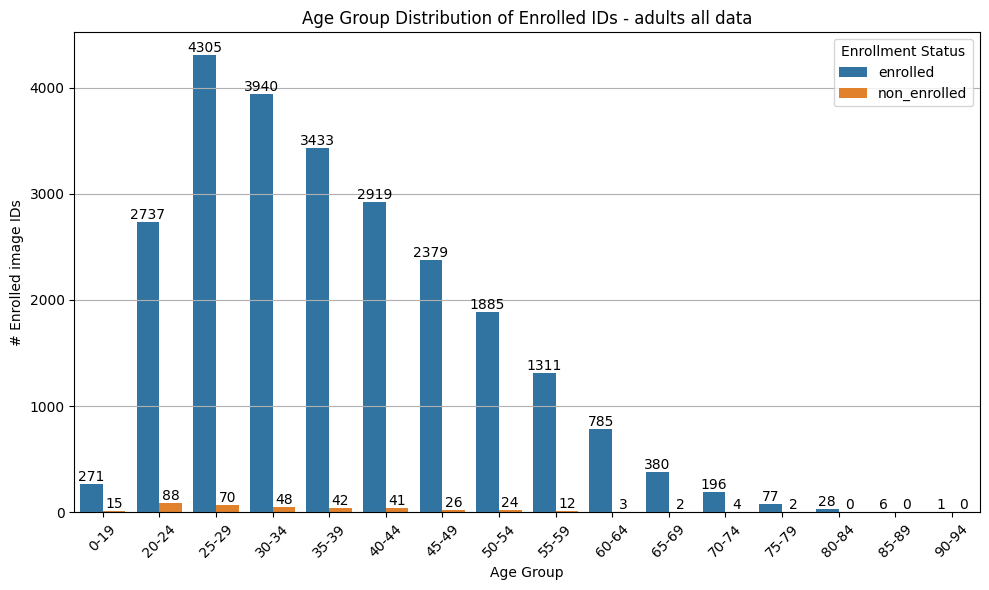

,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,Age Group
0,African_m.010lz5/m.010lz5_0001.jpg,m.010lz5_0001,m.010lz5,enrolled,African,38,m.010lz5,NaN,35-39
1,African_m.010lz5/m.010lz5_0002.jpg,m.010lz5_0002,m.010lz5,enrolled,African,29,m.010lz5,NaN,25-29
2,African_m.010lz5/m.010lz5_0003.jpg,m.010lz5_0003,m.010lz5,enrolled,African,37,m.010lz5,NaN,35-39
3,African_m.011y5k/m.011y5k_0001.jpg,m.011y5k_0001,m.011y5k,enrolled,African,40,m.011y5k,NaN,40-44
4,African_m.011y5k/m.011y5k_0002.jpg,m.011y5k_0002,m.011y5k,enrolled,African,43,m.011y5k,NaN,40-44
...,...,...,...,...,...,...,...,...,...
372,Indian_m.0jbc3/m.0jbc3_0002.jpg,m.0jbc3_0002,m.0jbc3,non_enrolled,Indian,43,m.0jbc3,NaN,40-44
373,Indian_m.0jkv_y7/m.0jkv_y7_0002.jpg,m.0jkv_y7_0002,m.0jkv_y7,non_enrolled,Indian,25,m.0jkv_y7,NaN,25-29
374,Indian_m.0j_9xt/m.0j_9xt_0001.jpg,m.0j_9xt_0001,m.0j_9xt,non_enrolled,Indian,49,m.0j_9xt,NaN,45-49
375,Indian_m.0k_lgy/m.0k_lgy_0001.jpg,m.0k_lgy_0001,m.0k_lgy,non_enrolled,Indian,34,m.0k_lgy,NaN,30-34


In [38]:
number_of_enrolled_ids_agebin_adults_full(adult_full_mated_and_nonmated, 'adults all data')

In [48]:
number_of_enrolled_ids_agebin_adults_full(children_full_mated_and_nonmated, 'children all data')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

# Plot: number of images per identity



In [53]:
df_YLFW.head()

,Age,Identity,Age Group
Indian_40_34,0,Indian_40,0-3
Caucasian_134_4,0,Caucasian_134,0-3
Caucasian_1276_4,0,Caucasian_1276,0-3
Asian_624_4,0,Asian_624,0-3
Caucasian_1001_3,0,Caucasian_1001,0-3


In [54]:
# count identities
print(df_YLFW['Identity'].value_counts())

#count unique identities
print(df_YLFW['Identity'].nunique())


Indian_602      16
Indian_528      14
Indian_484      13
Indian_613      13
African_318     12
                ..
Indian_425       1
Caucasian_76     1
Caucasian_9      1
Caucasian_67     1
Indian_440       1
Name: Identity, Length: 3042, dtype: int64
3042


In [55]:
image_counts = df_YLFW['Identity'].value_counts().reset_index()
image_counts.columns = ['Identity', 'Image Count']


In [56]:
def plot_images_per_identity_distribution(df, title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Count the number of images per identity
    image_counts = df['Identity'].value_counts().reset_index()
    image_counts.columns = ['Identity', 'Image Count']

    # Create the plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=image_counts, x='Identity', y='Image Count', palette='coolwarm')
    plt.title(f"Number of Images per Identity - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks([])  # Hide x-axis ticks
    plt.grid(axis='y')

    # Show the plot with a better layout
    plt.tight_layout()
    plt.show()


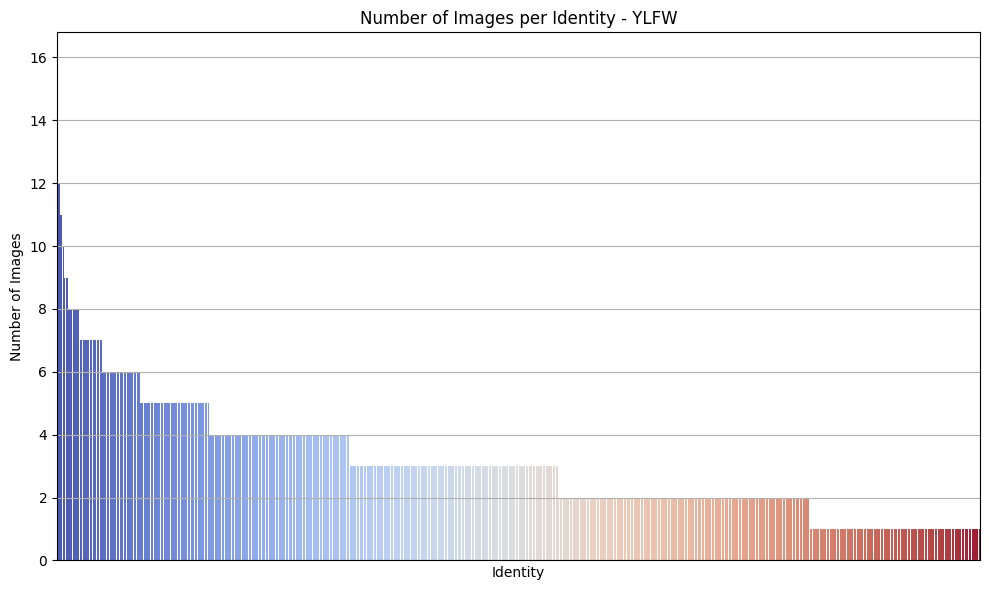

In [57]:
plot_images_per_identity_distribution(df_YLFW, 'YLFW')

# Plot: number of images per identity for each race

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_images_per_identity_per_race_distribution(df,title, figsize=(10, 6)):
    """
    Plots the distribution of the number of images per identity, grouped by race, within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # Sort the DataFrame for better visualization
    image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(data=image_counts, x='Identity', y='Image Count', hue='Race', palette='coolwarm')
    plt.title(f"Number of Images per Identity per Race - {title}")
    plt.xlabel("Identity")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.grid(axis='y')

    # Hide x-axis labels to avoid clutter
    plt.xticks([])

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


### Denne herunder tager lang tid 

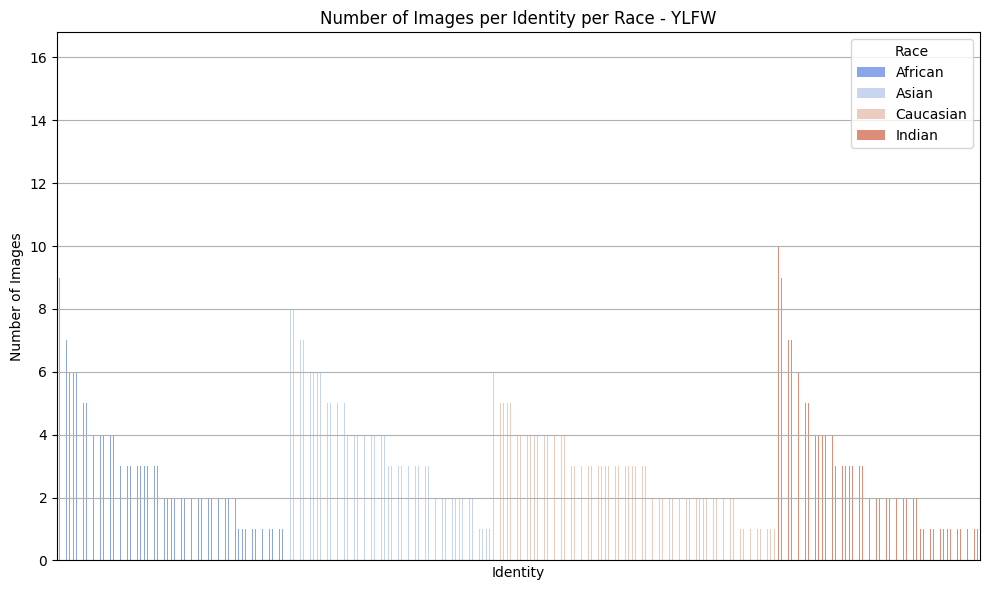

In [59]:
plot_images_per_identity_per_race_distribution(df_YLFW, 'YLFW')

In [60]:
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.sort_values(by=['Race', 'Image Count'], ascending=[True, False], inplace=True)
print(image_counts.head())

# drop all rows with image count 1
# These images are usefull in the open-set identification task, but not in the closed-set identification task
image_counts = image_counts[image_counts['Image Count'] > 1]
print(image_counts.head())

        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10
        Race     Identity  Image Count
16   African  African_113           12
188  African  African_285           12
225  African  African_318           12
223  African  African_316           11
94   African  African_191           10


In [61]:
# Extract race from the 'Identity' column
df = df_YLFW
df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

# Count the number of images per identity per race
image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')
image_counts.head()

,Race,Identity,Image Count
0,African,African_0,2
1,African,African_1,2
2,African,African_10,4
3,African,African_100,2
4,African,African_101,2


In [62]:
# boxplot of number of images peridentity per race
def plot_boxplot_images_per_identity_per_race(df,title, figsize=(10, 6)):
    """
    Plots a boxplot showing the distribution of the number of images per identity, grouped by race,
    within the provided DataFrame.

    Parameters:
    - df: Pandas DataFrame containing an 'Identity' column with race and identity information.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Extract race from the 'Identity' column
    df['Race'] = df['Identity'].apply(lambda x: x.split('_')[0])

    # Count the number of images per identity per race
    image_counts = df.groupby(['Race', 'Identity']).size().reset_index(name='Image Count')

    # excluding the ones 1 image per identity
    image_counts = image_counts[image_counts['Image Count'] > 1]

    # Create the boxplot
    plt.figure(figsize=figsize)
    sns.boxplot(data=image_counts, x='Race', y='Image Count', palette='coolwarm')
    plt.title(f"Distribution of Images per Identity per Race - {title}")
    plt.xlabel("Race")
    plt.ylabel("Number of Images")

    # Improve the layout and show the plot
    plt.tight_layout()
    plt.show()


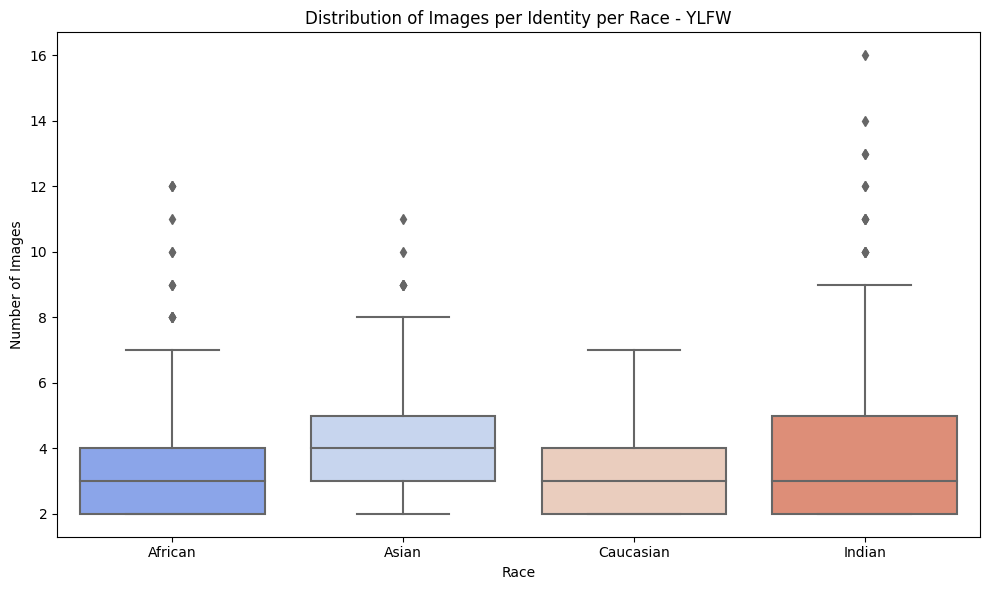

In [63]:
plot_boxplot_images_per_identity_per_race(df_YLFW, 'YLFW')